# <b> Model z uwikłanej formy do p. stanu

In [9]:
# imports
from IPython.display import display as disp
from sympy import symbols, cos, sin
import sympy as smp

# Newtown notation for derivatives (dot notation) -> bardzo spowalnia printowanie równań
from sympy.physics.mechanics import dynamicsymbols, init_vprinting
init_vprinting() 

In [5]:
# Symbols
Mt, Jt, mr, L, Lc, g, gamma, D, Ff = smp.symbols('M_t J_t m_r L L_c g gamma D F_f')

# t = smp.symbols('t', real=True)
t = smp.symbols('t')

the, x, u = smp.symbols('theta, x, u', cls=smp.Function)

the = the(t)
x = x(t)
u = u(t)

Dthe = smp.diff(the, t)
DDthe = smp.diff(the, t, 2)
Dx = smp.diff(x, t)
DDx = smp.diff(x, t, 2)

    
\begin{equation}
    \begin{bmatrix}
        M_t & m_rL\cos(\theta)\\
        m_rL\cos(\theta) & J_t 
    \end{bmatrix}
    \begin{bmatrix}
        \ddot{x}\\
        \ddot{\theta}
    \end{bmatrix}
    +
    \begin{bmatrix}
        F_f - Lm_r\sin(\theta)\dot{\theta}^2\\
        \gamma\dot{\theta} - m_r g L\sin(\theta)
    \end{bmatrix}
    +
    \begin{bmatrix}
        -u\\
        0
    \end{bmatrix}
    +
    \begin{bmatrix}
        -D\cos(\theta)\\
        -L_c D
    \end{bmatrix}
    =
    0
\end{equation}

$$\boldsymbol{F}(\ddot{x}, \dot{x}, \ddot{\theta}, \dot{\theta}, \theta, u, D) = 0$$
$$F_f = F_f(\dot{x})$$

In [6]:
a1 = smp.Matrix([ 
    [Mt, mr*L*cos(the)],
    [mr*L*cos(the), Jt]
])
a2  = smp.Matrix([
    [DDx],
    [DDthe]
])
a3 = smp.Matrix([
    [Ff - L*mr*sin(the)*Dthe**2],
    [gamma*Dthe - mr*g*L*sin(the)]
]) 
a4 = smp.Matrix([
    [-u],
    [0]
])
a5 = smp.Matrix([
    [-D*cos(the)],
    [-Lc*D]
])

In [7]:
DDx_ss, DDthe_ss = a1.inv() * (-a3 - a4 - a5)
DDx_ss = DDx_ss.simplify()
DDthe_ss = DDthe_ss.simplify()

'State vector.'

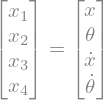

'State equations'

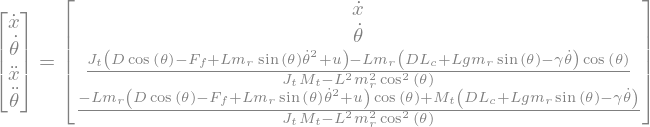

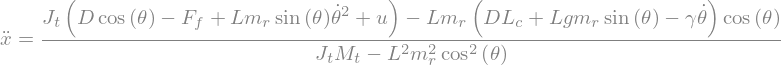

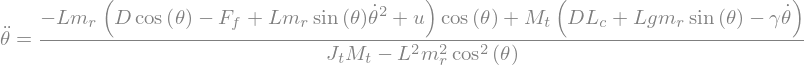

state_equations w x-ach


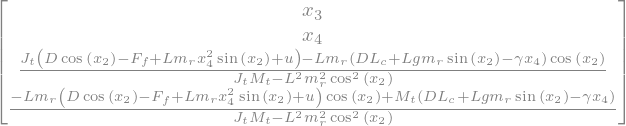

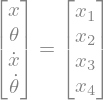

In [11]:
# State space representation
x1, x2, x3, x4 = smp.symbols('x_1 x_2 x_3 x_4', cls=smp.Function)
x1 = x1(t); x2 = x2(t); x3 = x3(t); x4 = x4(t) 

# state vector, x1 x2 x3 x4
state_vec = smp.Matrix([
    [x1],
    [x2],
    [x3],
    [x4]
])

# state vector, x theta ...
state_vec_noraml = smp.Matrix([
    [x],
    [the],
    [Dx],
    [Dthe]
])
disp('State vector.')
disp(
    smp.Eq(state_vec, state_vec_noraml)
)

# State equations
state_vec_diff = state_vec.diff(t)
state_vec_noraml_diff = state_vec_noraml.diff(t)

state_equations_normal = smp.Matrix([
    [Dx],
    [Dthe],
    [DDx_ss],
    [DDthe_ss]
])

disp('State equations')
disp(
    smp.Eq(
        state_vec_noraml_diff,
        state_equations_normal
    )
)

disp(
    smp.Eq(
        DDx, 
        DDx_ss
    )
)

disp(
    smp.Eq(
        DDthe,
        DDthe_ss
    )
)

state_equations = state_equations_normal.subs([(Dx, x3),
                                               (Dthe, x4),
                                               (x, x1),
                                               (the, x2)])

print('state_equations w x-ach')
disp(state_equations)

disp(
    smp.Eq(
        state_vec_noraml,
        state_vec
    )
)   